# Lecture_03 분류
<font size=5><b>(Scikit-learn을 활용한 머신러닝)<b></font>
<div align='right'>발표자: Hoe Sung Ryu ( 류 회 성 ) </div>

   
<table align="center">
<td>
<a target="_blank" href="https://colab.research.google.com/drive/1UHalL5YdENo7gvMiZvcpihS5GTfNlk8E?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a> 
</td>
</table>

    
    
![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9938463359E015470C)

    
    
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#이진분류" data-toc-modified-id="이진분류-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>이진분류</a></span><ul class="toc-item"><li><span><a href="#데이터셋:-MNIST" data-toc-modified-id="데이터셋:-MNIST-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터셋: MNIST</a></span></li><li><span><a href="#훈련/평가-데이터셋-나누기" data-toc-modified-id="훈련/평가-데이터셋-나누기-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>훈련/평가 데이터셋 나누기</a></span></li><li><span><a href="#모델학습" data-toc-modified-id="모델학습-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>모델학습</a></span></li><li><span><a href="#모델평가" data-toc-modified-id="모델평가-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>모델평가</a></span></li><li><span><a href="#다른-평가지표-사용" data-toc-modified-id="다른-평가지표-사용-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>다른 평가지표 사용</a></span></li></ul></li><li><span><a href="#다중-분류" data-toc-modified-id="다중-분류-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>다중 분류</a></span><ul class="toc-item"><li><span><a href="#다중-분류를-위한-학습/평가-데이터-나누기" data-toc-modified-id="다중-분류를-위한-학습/평가-데이터-나누기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>다중 분류를 위한 학습/평가 데이터 나누기</a></span></li><li><span><a href="#KNN-을-이용한-분류" data-toc-modified-id="KNN-을-이용한-분류-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>KNN 을 이용한 분류</a></span></li><li><span><a href="#SVM-을-이용한-분류" data-toc-modified-id="SVM-을-이용한-분류-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SVM 을 이용한 분류</a></span></li><li><span><a href="#Lightgbm을-이용한-분류" data-toc-modified-id="Lightgbm을-이용한-분류-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Lightgbm을 이용한 분류</a></span></li><li><span><a href="#Decision_Tree를-이용한-분류" data-toc-modified-id="Decision_Tree를-이용한-분류-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Decision_Tree를 이용한 분류</a></span></li></ul></li></ul></div>

In [3]:
# import 

import pandas as pd
import numpy as np 

from sklearn import * 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## 이진분류 

### 데이터셋: MNIST

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png width=50%>

In [2]:
# data load
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

print(f'X의 shape{X.shape}')
print(f'y의 shape{y.shape}')

X의 shape(70000, 784)
y의 shape(70000,)


In [4]:
num=int(input("번호를 입력하세요"))

번호를 입력하세요3


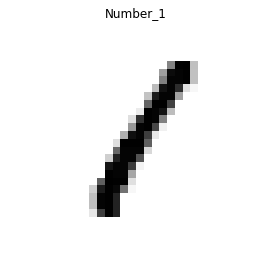

In [5]:
some_digit = X[num]
some_digit_image = some_digit.reshape(28, 28)
plt.title(f'Number_{y[num]}')
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

### 훈련/평가 데이터셋 나누기

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# 이진 분류 
# 5 또는 나머지 번호로 나누기 (5 VS rest number) 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### 모델학습

In [8]:
from sklearn.linear_model import SGDClassifier # 모델 설정
sgd_clf = SGDClassifier(random_state=42) # 모델 불러오기 
sgd_clf.fit(X_train, y_train_5)# 모델 학습 

SGDClassifier(random_state=42)

### 모델평가

In [9]:
# 간편 평가 방법 == score 
print(f'정확도: {round(sgd_clf.score(X_test, y_test_5),4)*100} %')

정확도: 94.92 %


### 다른 평가지표 사용 

<img src='../img/confusion.png'>

---

정확도(Accuracy):예측한 결과가 실제 결과와 얼마나 동일한 지를 나타내는 지표

- 직접구현: $\mbox{정확도(Accuracy)}=\frac{TP + TN}{TP+FN+FP+TN}$

- sklearn사용: 
    ```python 
    from sklearn.metrics import accuracy_score
    accuracy_score(???, ???)
    ```

---

정밀도 (Precision): `Positive`로 예측한 결과들 중 실제로 `Positive`인 결과들의 비율

- 직접구현: $\mbox{정밀도}=\frac{\mbox{TP}}{\mbox{TP+FP}}$
- sklearn사용:
    ```python 
    from sklearn.metrics import precision_score
    precision_score(???, ???)
    ```

---

재현율 (Recall) : 실제로 Positive인 결과들 중 Positive로 예측한 결과들의 비율

- 직접구현: $\mbox{재현율}=\frac{\mbox{TP}}{\mbox{TP+FN}}$
- sklearn사용
    ```python 
    from sklearn.metrics import precision_score
    recall_score(???, ???)
    ```

---

F1 score : 정밀도와 재현율의 조화평균

- 직접구현: $\mbox{F}1=\frac{2}{\frac{1}{\mbox{정밀도}} + \frac{1}{\mbox{재현율}}}$
- sklearn: 
    ```python 
    from sklearn.metrics import f1_score
    f1_score(???, ???)
    ```

In [10]:
# 예측값 저장 
# y_pred: 예측값 // y_test: 실제값 
y_pred = sgd_clf.predict(X_test)

In [11]:
# 혼돈 행렬 설정 
from sklearn.metrics import confusion_matrix 
TN, FP, FN, TP  = confusion_matrix(y_test_5, y_pred).ravel()

In [12]:
# 정확도 구하기 
# 1. sklearn 사용 
from sklearn.metrics import accuracy_score
print("sklearn 사용한 정확도:",accuracy_score(y_test_5, y_pred))# accuracy_score(실제값, 예측값)
# 2.  직접구하기
print("직접 구한 정확도:",(TP + TN )/ (TP + FN + FP +  TN ))

sklearn 사용한 정확도: 0.9492
직접 구한 정확도: 0.9492


In [13]:
# 정밀도 구하기 
# 1. sklearn 사용 
from sklearn.metrics import precision_score
print("sklearn 사용한 정밀도:",precision_score(y_test_5, y_pred))
# 2.  직접구하기
print("직접 구한 정밀도:",((TP) / (TP+FP) ))

sklearn 사용한 정밀도: 0.6618887015177066
직접 구한 정밀도: 0.6618887015177066


In [50]:
# recall 구하기 
# 1. sklearn 사용 
from sklearn.metrics import recall_score
print("sklearn 사용한 recall:",recall_score(y_test_5, y_pred))
# 2.  직접구하기
print("직접 구한 recall:", TP / (TP+FN))

0.8800448430493274

In [14]:
# f1 구하기 
# 1. sklearn 사용  
from sklearn.metrics import f1_score
print("sklearn 사용한 f1:",f1_score(y_test_5, y_pred))
# 2.  직접구하기
재현율 = TP / (TP+FN)
정밀도 = ((TP) / (TP+FP) )
print("직접 구한 f1:",2/((1/정밀도) + (1/재현율))) 

sklearn 사용한 f1: 0.75553416746872
직접 구한 f1: 0.7555341674687199


In [15]:
# 한번에 살펴보기 
from sklearn.metrics import classification_report
scores = classification_report(y_test_5, y_pred)
print(scores)

              precision    recall  f1-score   support

       False       0.99      0.96      0.97      9108
        True       0.66      0.88      0.76       892

    accuracy                           0.95     10000
   macro avg       0.82      0.92      0.86     10000
weighted avg       0.96      0.95      0.95     10000



## 다중 분류 

### 다중 분류를 위한 학습/평가 데이터 나누기

In [ ]:
print("MNIST 데이터 X 형태",X.shape)
print("MNIST 데이터 X 형태", y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, radom_state=42)

In [18]:
print("MNIST 데이터 X_train 형태",X_train.shape)
print("MNIST 데이터 y_train 형태", y_train.shape)
print("MNIST 데이터 X_test 형태",X_test.shape)
print("MNIST 데이터 y_test 형태", y_test.shape)

MNIST 데이터 X_train 형태 (60000, 784)
MNIST 데이터 y_train 형태 (60000,)
MNIST 데이터 X_test 형태 (10000, 784)
MNIST 데이터 y_test 형태 (10000,)


### KNN 을 이용한 분류 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 4)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [21]:
print("KNN Accuracy:",accuracy_score(y_test,y_pred))

KNN Accuracy: 0.9627


### SVM 을 이용한 분류 

In [22]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print("SVC Accuracy",svc.score(X_test,y_test))

Decision_Tree Accuracy 0.9792


### Lightgbm을 이용한 분류 

In [ ]:
# !pip install lightgbm

In [23]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier().fit(X_train, y_train)
print("Lightgbm Accuracy",lgbm.score(X_test,y_test))

Lightgbm Accuracy 0.9727


### Decision_Tree를 이용한 분류

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
print("Decision_Tree Accuracy",clf.score(X_test,y_test))

Decision_Tree Accuracy 0.8774


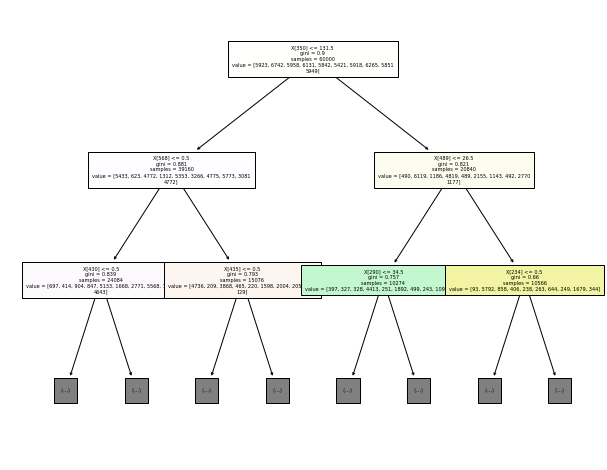

In [40]:
## 해석가능
plt.figure(figsize=(10, 8))
plot_tree(clf, max_depth=2, filled=True,fontsize=5)
plt.show()